# Assignment 3


## Instructions

Please complete this Jupyter notebook and then convert it to a `.py` file called `assignment3.py`. Upload this file to Gradescope, and await feedback. 

You may submit as many times as you want up until the deadline. Only your latest submission counts toward your grade.

Some tests are hidden and some are visible. The outcome of the visible checks will be displayed to you immediately after you submit to Gradescope. The hidden test outcomes will be revealed after final scores are published. 

This means that an important part of any strategy is to **start early** and **lock in all the visible test points**. After that, brainstorm what the hidden checks could be and collaborate with your teammates.


### Problem 1


Recall the derivation of the posterior
\begin{align}
\pi(\theta \mid y) 
&\propto L(y \mid \theta) \pi(\theta) \\
&\propto \underbrace{ \left\{ \theta^{-n/2}\exp\left[-\frac{\sum_i y_i^2}{2\theta} \right] \right\}}_{ \propto L(y \mid \theta)} \underbrace{\theta^{-(a+1)}\exp\left[ - b/\theta \right] }_{ \propto \pi(\theta)}  \\
&= \theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right]
\end{align}

where $\theta > 0$ and $\pi(\theta) = \text{Inverse-Gamma}(a,b)$ and

$$
L(y \mid \theta) \propto \theta^{-n/2}\exp\left[-\frac{\sum_i y_i^2}{2\theta} \right]
$$

1.

What is the natural logarithm of the normalizing constant of the final line? In other words, what do we have to divide $\theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right]$ by so that it integrates to $1$? Then take the natural log of that. 

Stated differently, what is $\log \int_0^\infty \theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right] \text{d} \theta$? 

Assume
 - $a = 10$
 - $b = 11$
 - $n = 42$
 - $s = 15$
 


Assign your answer to `log_norm_const`

NB1: if we didn't use the logarithm, the normalizing constant would be *way* too close to $0$.


NB2: You're not doing calculus here. Rely on the fact that every normalized density integrates to $1$.

In [100]:
from scipy import special
import numpy as np

def solve_integral(a, n, b, s):
    alpha = a + n / 2
    beta = b + n * s / 2
    
    log_gamma_part = special.gammaln(alpha)
    log_power_part = -alpha * np.log(beta)
    
    return log_gamma_part + log_power_part

In [101]:
log_norm_const = solve_integral(10,42,11,15)
log_norm_const

-104.73558247353778

2. 

Are either of these dependent on the value of $\theta$? If yes, assign `True` to `dependent_on_theta`. Otherwise assign `False`

In [102]:
# Because we integrate over theta the normalizing constant is not dependent on theta.
dependent_on_theta = False

### Problem 2


Assume the same model as the previous question except assume the mean of $y \mid \theta$ is now $\mu \neq 0$. You can continue to assume that $\mu$ is still known, it's just nonzero.

How do the derivations change? Adapt the derivations and upload a scanned copy of your work to Gradescope portal.



--------------

### With the mean ($\mu$) now a part of the Likelihood distribution, the likelihood must contain ($\mu$) when calculating the sum of the squared error. Because $\mu$ is known it is just a constant here and thus just another variable alongside a, b, n, and s.

$$
L(y \mid \theta) \propto \theta^{-n/2}\exp\left[-\frac{\sum_i (y_i - \mu)^2}{2\theta} \right]
$$

$$
\pi(\theta) \propto \theta^{-(a+1)}\exp\left[ - \frac{b}{\theta} \right]
$$

$$
\pi(\theta \mid y) \propto \theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b + \sum_i (y_i - \mu)^2 / 2}{\theta} \right]
$$

--------------

### Problem 3

Sometimes picking the hyperparameters of a prior can be tricky if they don't have an easy interpretation. Here is a way to pick a prior that involves simulating data. If the data simulations look like you would expect, then the prior is a reasonable choice.

Assume the same model as the question one and assume we are dealing with medium-frequency (e.g. every five seconds) stock index percentage returns scaled by $100$. Choose an inverse gamma prior by simulating from the **prior predictive distribution.** The prior predictive distribution is

$$
p(y) = \int L(y \mid \theta) \pi(\theta) \text{d}\theta.
$$


NB1: **do not look at any data before doing this!** You will all have different priors!

NB2: it might take you a few iterations of all these subquestions to find hyperparameters that you like. 

1.

First, assign your chosen $a$ and $b$ hyperparameters to `prior_a` and `prior_b`. Please restrict your attention to $a > 2$ (I'll explain why in class).

In [188]:
prior_a = 5
prior_b = 35

2.

Simulate $\theta^1, \theta^2, \ldots, \theta^{10,000}$ from the prior. Call these samples `prior_param_samples`

NB: we are using a *superscript* to denote iteration number.

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm

prior_param_samples = invgamma.rvs(a=prior_a, scale=prior_b, size=10000)

2.

For each parameter sample, simulate $100$ stock returns from the likelihood. Arrange your simulations as one super long numpy array. Call it `prior_predic_samps`.

NB: For parameter sample $i$, you have 

$$
y_1, \ldots, y_{100} \mid \theta^i \sim \text{Normal}(0, \theta^i)
$$

NB2: Each $\theta^i$ is the **variance** not the standard deviation.

In [191]:
prior_predic_samps = [norm.rvs(scale=np.sqrt(theta), size=100) for theta in prior_param_samples]
prior_predic_samps = np.concatenate(prior_predic_samps)
prior_predic_samps

array([ 2.73087518, -0.09204336, -0.39871202, ...,  0.64430856,
       -3.95685859, -0.57948693])

3.

Make a histogram of all your data samples. Upload a `.pdf` or a `.png` to Gradescope. Remember, this picture has to agree with your intuition about what stock returns could look like. Otherwise, your prior hyperparameters aren't a good choice!

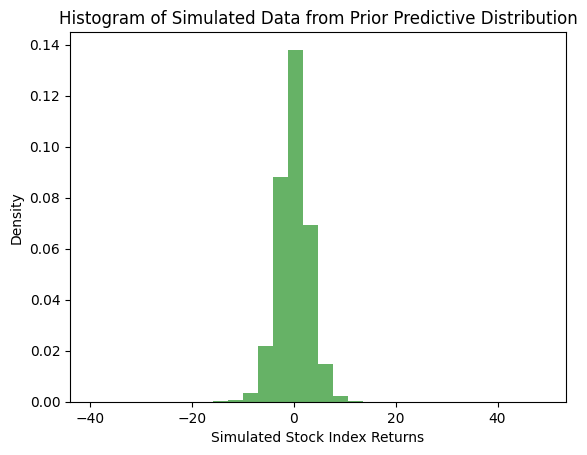

In [192]:
plt.hist(prior_predic_samps, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Simulated Data from Prior Predictive Distribution')
plt.xlabel('Simulated Stock Index Returns')
plt.ylabel('Density')
plt.show()

4.

What is the difference between a prior predictive distribution and a posterior predictive distribution? What do they have in common? Upload your free response to Gradescope.

-----------

# Prior Predictive Distribution: 

P(y) and represents the distribution of the observable data y by integrating or marginalizing out the parameters $\theta$. This shows what the data may look like after observing it assuming prior knowledge of the parameters $\theta$

# Posterior Predictive Distribution:

The posterior predictive distribution p(y_new | y) represents the distribution of future observable data given the data we already have y and integrating over or marginalizing out the parameters $\theta$. This approach encorporates both the knowledge of the previously observed data or the likelihood as well as prior information learned in the model parameters $\theta$. 

-----------

### Problem 4


Recall the derivation of the posterior
$$
\theta \mid y_1, \ldots, y_n \sim \text{Normal}\left( \bar{x}\left(\frac{\frac{n}{1}}{\frac{1}{b} + \frac{n}{1}} \right) + a\left(\frac{\frac{1}{b}}{\frac{1}{b} + \frac{n}{1}} \right) ,\frac{1}{\frac{1}{b} + \frac{n}{1} } \right)
$$

where $\theta$ is the mean parameter, $\pi(\theta) = \text{Normal}(a,b)$ and 


The work was 
$$
L(y \mid \theta) \propto \exp\left[-\frac{\sum_i (y_i-\theta)^2}{2} \right]
$$

\begin{align}
\pi(\theta \mid y) 
&\propto L(y \mid \theta) \pi(\theta) \\
&\propto \exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]
\end{align}


1.

What is the natural logarithm of the normalizing constant of the final line? In other words, what do we have to divide $\exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]$ by so that it integrates to $1$? Then take the natural log of that. 

Stated differently, what is $\log \int_{-\infty}^\infty \exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]\text{d} \theta$? 


Assign your answer to `log_norm_const2`

NB: You're not doing calculus here. Rely on the fact that every normalized density integrates to $1$.


Assume
 - $a = 10$
 - $b = 11$
 - $n = 42$
 - $\bar{x} = 15$



In [193]:
import math

a=10
b=11
n=42
x_bar=15

post_mean = x_bar * (n / (1/b + n)) + a * (1/b / (1/b + n))

post_var = 1 / (1/b + n)

log_norm_const2 = math.log(math.sqrt(2 * math.pi * post_var))
log_norm_const2

-0.950977357439259

### Problem 5


Assume the same model as the previous question except assume the variance of $y \mid \theta$ is now $\sigma^2 \neq 1$. How do the derivations change? Adapt the derivations and upload a scanned copy of your work to Gradescope portal.



-------------

Assume the variance of \(y \mid \theta\) is now \(\sigma^2 \neq 1\).

#### Likelihood:
For $(\sigma^2 \neq 1)$, the likelihood becomes:

$$
L(y \mid \theta, \sigma^2) \propto \exp\left[-\frac{\sum_i (y_i - \theta)^2}{2\sigma^2} \right]
$$

#### Prior:
The prior for \(\theta\) remains a normal distribution:

$$
\pi(\theta) = \text{Normal}(a, b)
$$

#### Posterior:
Combining the likelihood and prior:

$$
\pi(\theta \mid y) \propto L(y \mid \theta, \sigma^2) \pi(\theta)
$$

Substituting the expressions for the likelihood and the prior:

$$
\pi(\theta \mid y) \propto \exp\left[ -\frac{1}{2\sigma^2} \sum_i (y_i - \theta)^2 \right] \exp\left[ -\frac{1}{2b} (\theta - a)^2 \right]
$$

Combining the exponential terms:

$$
\pi(\theta \mid y) \propto \exp\left[ -\frac{1}{2} \left( \frac{\sum_i (y_i - \theta)^2}{\sigma^2} + \frac{(\theta - a)^2}{b} \right) \right]
$$

Completing the square, we obtain the posterior distribution:

$$
\theta \mid y \sim \text{Normal} \left( \frac{\sum_i y_i / \sigma^2 + a / b}{n / \sigma^2 + 1 / b}, \frac{1}{n / \sigma^2 + 1 / b} \right)
$$

--------------

### Problem 6

We will return to the model described in question one. Specifically, we will assume our data are normally distributed with mean $0$, and that we're only uncertain about the variance parameter. We will also use the prior hyperparameters we chose in an earlier problem!

Our data set will be intraday stock returns. 

1.

Download and read in the data set `SPY-STK.csv`. Ignore every column except `bid_price_close` and `time`. These are prices of the S\&P 500 exchange traded fund recorded on March 26, 2024. Call your data set `stock_data` and store it as a `pandas` `DataFrame`. 


In [194]:
import pandas as pd

stock_data = pd.read_csv("SPY-STK.csv", usecols=['bid_price_close', 'time'])

In [195]:
stock_data.head()

,time,bid_price_close
0,2024-03-26T09:22:05,520.81
1,2024-03-26T09:22:10,520.82
2,2024-03-26T09:22:15,520.80
3,2024-03-26T09:22:20,520.81
4,2024-03-26T09:22:25,520.83


2.

Calculate percent returns and make sure to scale them by $100$. Store them in a `pandas` `Series` called `one_day_returns`.

In [196]:
one_day_returns = stock_data['bid_price_close'].pct_change()
one_day_returns = one_day_returns * 100

3.

Assign your Inverse Gamma posterior hyperparameters to `posterior_a` and `posterior_b`. Then create an `scipy.stats.invgamma` for your posterior. Give it the right hyperparameters and call it `posterior` 

In [197]:
sum_squared_returns = np.sum(one_day_returns ** 2)
n = len(one_day_returns)

posterior_a = prior_a + n/2
posterior_b = prior_b + sum_squared_returns / 2
posterior = invgamma(a=posterior_a, scale=posterior_b)

In [198]:
theta_samples = posterior.rvs(size=10000)

post_pred_samps = norm.rvs(loc=0, scale=np.sqrt(theta_samples))
post_pred_samps

array([ 0.17004076,  0.20592599,  0.1161093 , ..., -0.24251702,
       -0.11252204, -0.1876098 ])

5. 


Use the posterior predictive samples and create two plots to show whether this model represents reality well. Use a histogram and a time series plot. 

Do the histograms look similar? Do the time-ordered observations look similar. What are the strengths and weaknesses of this model?

What you are doing now is called a **posterior predictive check**. 

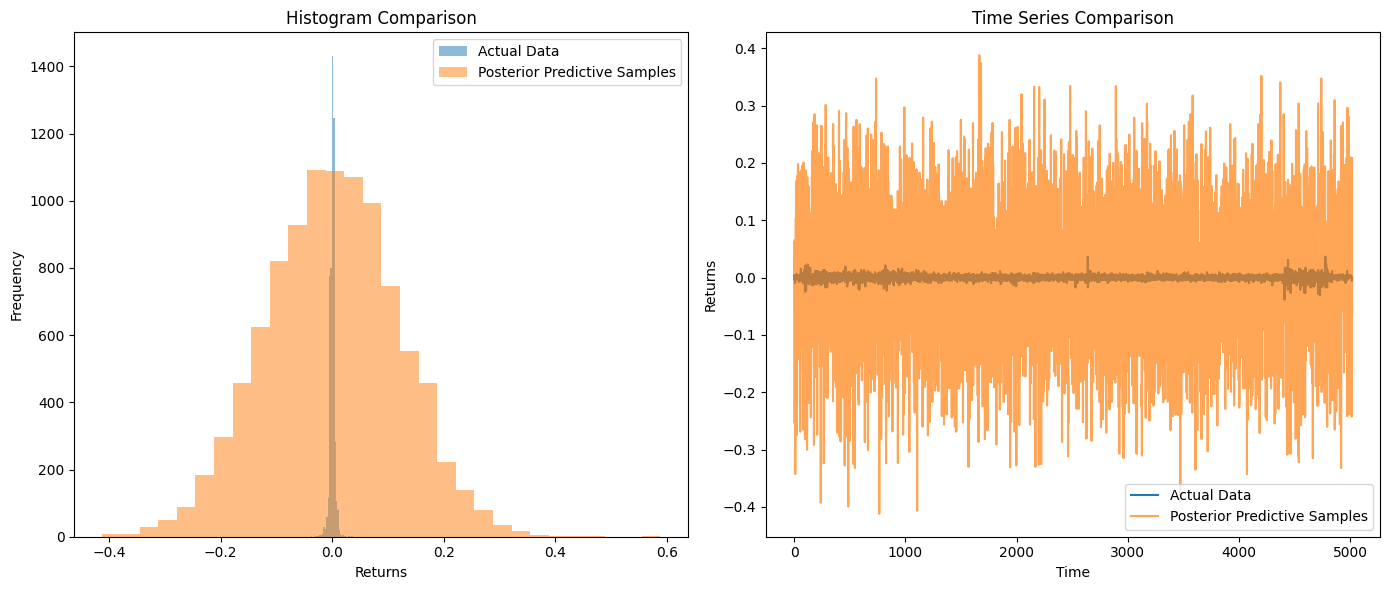

In [199]:
post_pred_samps_np = np.array(post_pred_samps)

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(one_day_returns, bins=30, alpha=0.5, label='Actual Data')
plt.hist(post_pred_samps, bins=30, alpha=0.5, label='Posterior Predictive Samples')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram Comparison')

# Time Series Plot
plt.subplot(1, 2, 2)
plt.plot(one_day_returns.values, label='Actual Data')
plt.plot(np.random.choice(post_pred_samps, size=len(one_day_returns)), label='Posterior Predictive Samples', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.title('Time Series Comparison')

plt.tight_layout()
plt.show()

In [98]:
# distributions do not match great but with some hyperparameter tuning on the prios could likely be improved